In [2]:
'''This code showcases Image Compression using SVD (Singular Value Decomposition).'''
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

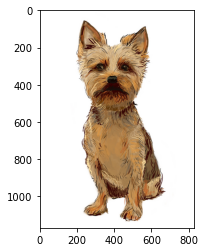

In [4]:
img = Image.open( 'Oboe.jpg' )
_ = plt.imshow( img )

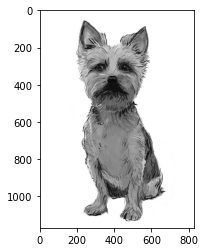

In [5]:
#For sake of simplicity, convert to Gray Scale Image.
img_gray = img.convert( 'LA' )
_ = plt.imshow( img_gray )

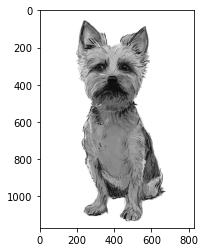

In [8]:
img_mat = np.array( list( img_gray.getdata( band = 0 ) ), float )
img_mat.shape = ( img_gray.size[1], img_gray.size[0] )

img_mat = np.matrix ( img_mat )

_ = plt.imshow( img_mat, cmap = 'gray' )

In [9]:
#Calculating the SVD.

# Given Matrix A = U. Sigma . V_T

U, sigma, V_T = np.linalg.svd( img_mat )

In [13]:
#WKT, the most prominent feature is in the beginning of Sigma, diagonal Matrix.
D = np.diag( sigma[:1] )

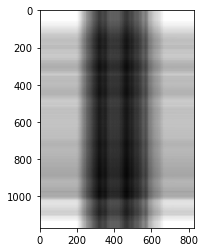

In [15]:
reconst = np.matrix( U[ :, :1 ] * D * np.matrix( V_T[:1, :] ) )
_ = plt.imshow( reconst, cmap = 'gray' )
#One step is not sufficient, so we add additional Singular vectors.

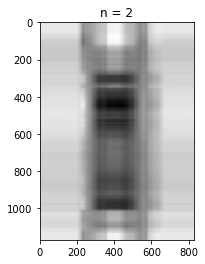

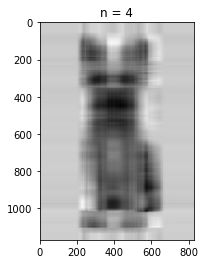

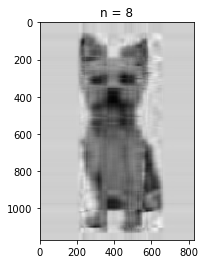

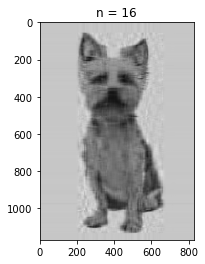

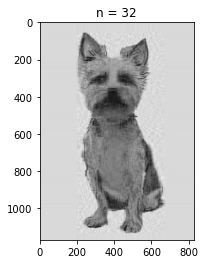

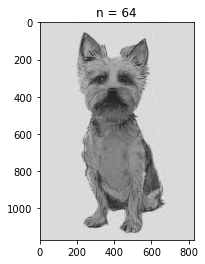

In [16]:
for i in [ 2, 4, 8, 16, 32, 64 ]:
    reconst = np.matrix( U[ :, :i ] * np.diag( sigma[:i] ) * np.matrix( V_T[:i, :] ) )
    plt.imshow( reconst, cmap = 'gray' )
    title = "n = %s" % i
    plt.title( title )
    plt.show()

In [17]:
img_mat.shape

(1169, 827)

In [18]:
reconst.shape

(1169, 827)